In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Load dataset
df = pd.read_csv(r"C:\Users\User\OneDrive\Documents\YiJia\INTI\Sem 9\6006CEM Machine Learning and Related Applications\CW\MachineLearningCW\Classification\text.csv")

# Display the first few rows of the dataset
print("Initial Dataset Shape:", df.shape)
print("\nFirst few rows:")
df.head()


Initial Dataset Shape: (416809, 2)

First few rows:


,text,label
0,i just feel really helpless and heavy hearted,4
1,ive enjoyed being able to slouch about relax a...,0
2,i gave up my internship with the dmrg and am f...,4
3,i dont know i feel so lost,0
4,i am a kindergarten teacher and i am thoroughl...,4


In [3]:
"""  0: sadness, 1: joy, 2: love, 3: anger, 4: fear, and 5: surprise"""

'  0: sadness, 1: joy, 2: love, 3: anger, 4: fear, and 5: surprise'

In [4]:
# Check for missing values
print("\nChecking for missing values:")
print(df.isnull().sum())


Checking for missing values:
text     0
label    0
dtype: int64


In [5]:
# Check for duplicate rows
duplicates = df[df.duplicated()]
print("\nDuplicate Rows:\n", duplicates)


Duplicate Rows:
                                                      text  label
8397    i told my staff i said you know i feel invigor...      1
15187                                         i feel fine      1
15638   i feel bob loblaw is a handsome professional m...      1
19413   i feel tortured var fb comment action link hre...      3
23711   i also have no particular feeling of patriotis...      2
...                                                   ...    ...
415504  i am a sentimental woman n extremely sensitive...      2
415867  i just screend up your profile and i feel you ...      1
415891                             the death of my father      0
416310                                 i feel so innocent      1
416424      i feel more adventurous willing to take risks      1

[686 rows x 2 columns]


In [6]:
# Drop duplicates
df = df.drop_duplicates()

In [7]:
df['label'].value_counts()

1    140779
0    120989
3     57235
4     47664
2     34497
5     14959
Name: label, dtype: int64

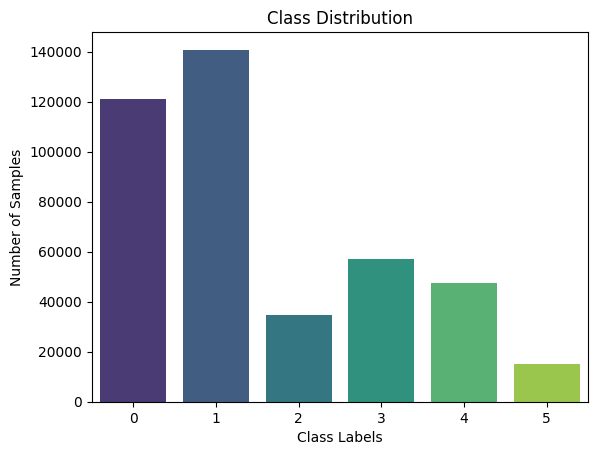

In [8]:
# Plot class distribution
class_counts = df['label'].value_counts()
sns.barplot(x=class_counts.index, y=class_counts.values, palette="viridis")
plt.xlabel("Class Labels")
plt.ylabel("Number of Samples")
plt.title("Class Distribution")
plt.show()

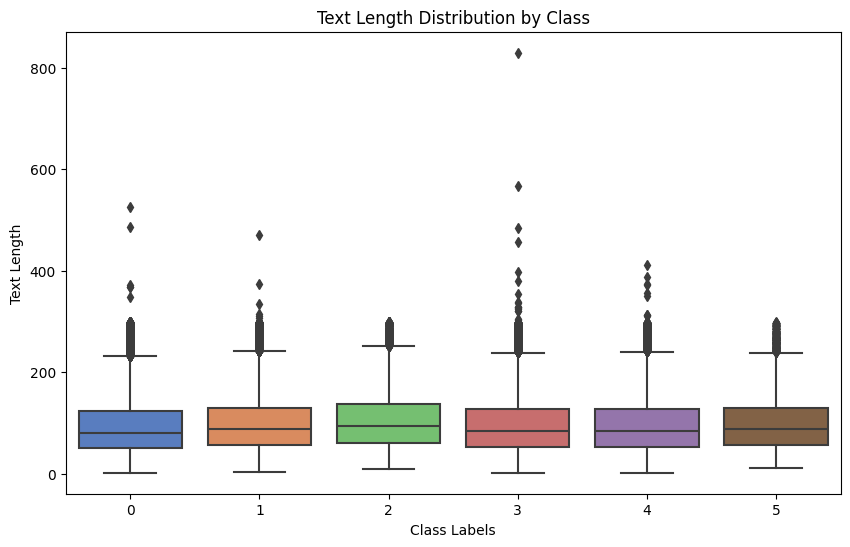

In [9]:
# Analyze text length
df['text_length'] = df['text'].apply(len)

# Plot text length distribution per class
plt.figure(figsize=(10, 6))
sns.boxplot(x='label', y='text_length', data=df, palette="muted")
plt.title("Text Length Distribution by Class")
plt.xlabel("Class Labels")
plt.ylabel("Text Length")
plt.show()


In [10]:
# Convert text to numerical features (TF-IDF)
vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
X = vectorizer.fit_transform(df['text'])
y = df['label']

In [11]:
from imblearn.under_sampling import RandomUnderSampler

# Apply undersampling because of class imbalance
undersampler = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = undersampler.fit_resample(X, y)

In [12]:
# New class distribution
unique, counts = np.unique(y_resampled, return_counts=True)
print("\nClass Distribution After Undersampling:\n", dict(zip(unique, counts)))



Class Distribution After Undersampling:
 {0: 14959, 1: 14959, 2: 14959, 3: 14959, 4: 14959, 5: 14959}


In [13]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(71803, 5000)
(17951, 5000)
(71803,)
(17951,)


In [14]:
# Train Logistic Regression Model
lr_model = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)
lr_model.fit(X_train, y_train)

# Evaluate Logistic Regression
y_pred_lr = lr_model.predict(X_test)
print("\nLogistic Regression Classification Report:\n", classification_report(y_test, y_pred_lr))
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
f1_lr = f1_score(y_test, y_pred_lr, average='weighted')  # Using 'weighted' to account for imbalanced classes
print("Logistic Regression F1-Score:", f1_lr)


Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.90      0.92      2979
           1       0.91      0.85      0.88      2949
           2       0.90      0.95      0.93      3075
           3       0.92      0.92      0.92      3000
           4       0.90      0.87      0.89      3034
           5       0.89      0.96      0.92      2914

    accuracy                           0.91     17951
   macro avg       0.91      0.91      0.91     17951
weighted avg       0.91      0.91      0.91     17951

Logistic Regression Accuracy: 0.9096986240320873
Logistic Regression F1-Score: 0.9093168209752411


In [15]:
# Train Support Vector Machine (SVM) Model
svm_model = SVC(kernel='linear', class_weight='balanced', random_state=42)
svm_model.fit(X_train, y_train)

# Evaluate SVM
y_pred_svm = svm_model.predict(X_test)
print("\nSVM Classification Report:\n", classification_report(y_test, y_pred_svm))
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))

# Print F1-Score
f1_svm = f1_score(y_test, y_pred_svm, average='weighted')  # Using 'weighted' to account for imbalanced classes
print("SVM F1-Score:", f1_svm)


SVM Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.88      0.91      2979
           1       0.94      0.83      0.89      2949
           2       0.89      0.98      0.93      3075
           3       0.92      0.91      0.92      3000
           4       0.90      0.88      0.89      3034
           5       0.87      0.99      0.93      2914

    accuracy                           0.91     17951
   macro avg       0.91      0.91      0.91     17951
weighted avg       0.91      0.91      0.91     17951

SVM Accuracy: 0.9115369617291516
SVM F1-Score: 0.9109430538089558


In [16]:
# Test with my data

In [17]:
# Ensure X_train contains original text strings
# For example:
# X_train = df['text'].tolist()  # if using a DataFrame
# X_train = [text1, text2, ...]  # list of text strings

# Initialize the TF-IDF Vectorizer
vectorizer = TfidfVectorizer(stop_words='english')

# Fit and transform the ORIGINAL training text data
#X_train_tfidf = vectorizer.fit_transform(X_train)

# Transform new input text using the fitted vectorizer
input_text = ["I am feeling great today!"]
input_vectorized = vectorizer.transform(input_text)

# Now use the trained models to make predictions
lr_pred = lr_model.predict(input_vectorized)
svm_pred = svm_model.predict(input_vectorized)

# Class label mapping (example)
class_labels = {0: 'Happy', 1: 'Sad', 2: 'Angry', 3: 'Neutral', 4: 'Fearful', 5: 'Surprised'}

# Output the predictions
print(f"Logistic Regression Prediction: {class_labels[lr_pred[0]]}")
print(f"SVM Prediction: {class_labels[svm_pred[0]]}")

NotFittedError: The TF-IDF vectorizer is not fitted